# PyTorch installation
Package has dependency on machine architecture. 
To try out this code locally you need to installPyTorch using the command generated on the website [pytorch.org(https://pytorch.org/).
You will learn about this in a later lecture. For the time being it is recommended that you use [*Google colab*](https://colab.research.google.com/github/acloudfan/gen-ai-app-dev/blob/main/AI-Essentials/basic_neural_network_demo.ipynb) for trying this code

In [ ]:
# The exact command depends on your machine - On Google Colab run this cell to install PyTorch package.
#pip install torch

In [1]:
# Import PyTorch packages
import torch
import torch.nn as nn
import torch.optim as optim

# This to plot the predictions and data points for visuals
import matplotlib.pyplot as plt

## Step 1: Generate synthetic data

In [2]:
# For reproducibility
torch.manual_seed(42)

# Constants for the linear function y = ax + b
a = 3.0
b = 2.0

# Generate random inputs [100 points for training data (x between 0 & 10)]
x_train = torch.rand(100, 1) * 10

# y = ax + b with some noise
# Noise is adjusted by multiplying with 0.5
y_train = a * x_train + b + torch.randn(100, 1) * 0.5

## Step 2: Define the neural network model

In [3]:
# A class representing a model. This is a standard way of defining a neural
# network when using PyTorch
class NeuralNetworkModel(nn.Module):
    def __init__(self):
        super(NeuralNetworkModel, self).__init__()

        # In neural networks, the input layer is typically not explicitly defined as a separate layer in the code.

        # First Hidden Layer: The first hidden layer self.hidden1 is defined as nn.Linear(1, 10),
        # meaning it takes an input of size 1 (which corresponds to the single feature in x_train) and produces an output of size 10.
        self.hidden1 = nn.Linear(1, 10)

        # Defined as nn.Linear(10, 10), meaning it takes the 10 outputs from the first hidden layer and maps them to another set of 10 neurons.
        self.hidden2 = nn.Linear(10, 10)

        # Defined as nn.Linear(10, 1), meaning it takes the 10 outputs from the second hidden layer and maps them to a single output.
        self.output = nn.Linear(10, 1)

    # Define the forward flow of data
    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x

# Create an instance of the class that represents the model
model = NeuralNetworkModel()

## Step 3: Define the loss function and optimizer
We define a neural network model with two hidden layers, each having 10 neurons. ReLU activation is used for the hidden layers.

In [4]:
# Mean Square Error
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

## Step 4: Train the model
The model is trained for 1000 epochs. The loss is printed every 100 epochs to monitor the training process.

In [5]:
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.4464
Epoch [200/1000], Loss: 0.1638
Epoch [300/1000], Loss: 0.1635
Epoch [400/1000], Loss: 0.1631
Epoch [500/1000], Loss: 0.1630
Epoch [600/1000], Loss: 0.1629
Epoch [700/1000], Loss: 0.1628
Epoch [800/1000], Loss: 0.1627
Epoch [900/1000], Loss: 0.1619
Epoch [1000/1000], Loss: 0.1617


## Step 5: Evaluate the model
After training, we evaluate the model and plot the original data along with the predicted values.

### Predict with x

In [6]:
# Change this to test predictions
# NOTICE that prediction performance is good with smaller numbers
# compared to larger numbers. It is bcaz model was trained with smaller numbers

x = 5.0
print("Actual value: ", (a*x+b))

# Convert x to a Pytorch tensor
tensor = torch.tensor([x])

# Run the prediction
with torch.no_grad():
    predicted = model(tensor).detach().numpy()

# Keep in mind we added some noise deliberately
print("Predicted   : ", predicted[0:][0])

Actual value:  17.0
Predicted   :  16.997913


### Re-use the training data for evaluation of the model predictions

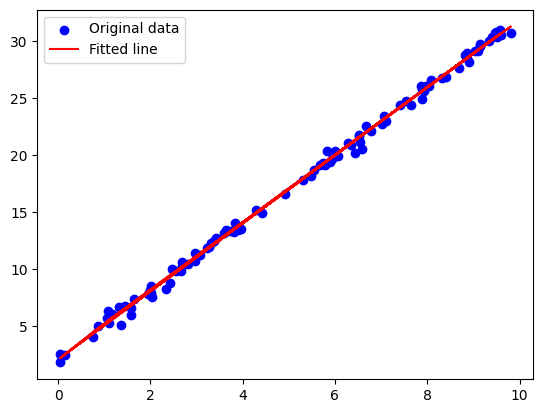

In [7]:
model.eval()
with torch.no_grad():
    predicted = model(x_train).detach().numpy()

# Plot the results
plt.scatter(x_train.numpy(), y_train.numpy(), color='blue', label='Original data')
plt.plot(x_train.numpy(), predicted, color='red', label='Fitted line')
plt.legend()
plt.show()
